In [ ]:
#from notebook.services.config import ConfigManager; ConfigManager().update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
#import numpy as np
#from scipy.stats import uniform
#from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
gdp = pd.read_csv("./data/gdp.csv")
gdp["gdp"] = gdp["GDP (constant 2010 US$)"]/1e9
pop = pd.read_csv("./data/population.csv")

In [ ]:
display(gdp.head(5))
display(pop.head(5))

In [ ]:
px.line(pop.query("Year > 1900"), x="Year", y="Total population (Gapminder, HYDE & UN)", color="Entity")

In [ ]:
pop = pop.rename(columns={"Total population (Gapminder, HYDE & UN)":"population"})
pop.head(5)

In [ ]:
gdp2017 = gdp.query("Year == 2017")
pop2017 = pop.query("Year == 2017")
display(gdp2017.head(5))
display(pop2017.head(5))

In [ ]:
gdp_and_pop_2017 = pd.merge(left=gdp2017, right=pop2017, left_on="Entity", right_on="Entity", how="outer")
gdp_and_pop_2017.head()

In [ ]:
gdp_and_pop_2017["gdp_per_capita"] = gdp_and_pop_2017["GDP (constant 2010 US$)"]/gdp_and_pop_2017["population"]
gdp_and_pop_2017.head()

In [ ]:
px.bar(gdp_and_pop_2017.sort_values("gdp_per_capita"), x="Entity", y="gdp_per_capita")

In [ ]:
gdp_and_pop = pd.merge(left=gdp, right=pop, left_on=["Entity", "Year"], right_on=["Entity", "Year"], how="left")
gdp_and_pop

In [ ]:
gdp_and_pop["gdp_per_capita"] = gdp_and_pop["GDP (constant 2010 US$)"]/gdp_and_pop["population"]
gdp_and_pop

In [ ]:
px.line(gdp_and_pop.query("Entity == 'Mexico'"), x="Year", y="gdp_per_capita")

In [ ]:
gdp_per_capita_1960 = gdp_and_pop.query("Year == 1960").set_index("Entity")
gdp_per_capita_1960

In [ ]:
gdp_and_pop_by_entity = gdp_and_pop.set_index("Entity")
#display(gdp_and_pop_by_entity)
gdp_and_pop_by_entity["gdp_per_capita_ratio"] = gdp_and_pop_by_entity["gdp_per_capita"]/gdp_per_capita_1960["gdp_per_capita"]
gdp_and_pop_by_entity["pop_ratio"] = gdp_and_pop_by_entity["population"]/gdp_per_capita_1960["population"]
gdp_and_pop_by_entity["gdp_ratio"] = gdp_and_pop_by_entity["gdp"]/gdp_per_capita_1960["gdp"]
gdp_and_pop_by_entity = gdp_and_pop_by_entity.reset_index().dropna()
display(gdp_and_pop_by_entity)

In [ ]:
#px.line(gdp_and_pop_by_entity, x="Year", y="gdp_per_capita_ratio", color="Entity")
px.line(gdp_and_pop_by_entity, x="Year", y="pop_ratio", color="Entity")

In [ ]:
px.scatter(gdp_and_pop_by_entity.query("Year == 2017"), x="gdp_per_capita_ratio", y="pop_ratio", color="Entity", size="gdp_ratio")

In [ ]:
life_exp = pd.read_csv("./data/life_expectancy.csv")
life_exp = life_exp.drop(columns=["Code"])
#life_exp = life_exp[["Entity", "Year", "Life expectancy"]]
life_exp

In [ ]:
gdp_pop_le = pd.merge(left=gdp_and_pop_by_entity, right=life_exp, left_on=["Entity", "Year"], right_on=["Entity", "Year"], how="left")
gdp_pop_le

In [ ]:
px.scatter(gdp_pop_le.query("Year == 2017"), x="gdp_per_capita", y="Life expectancy", color="Entity", log_x=True)

In [ ]:
#px.histogram(gdp_pop_le.query("Year == 2017")["Life expectancy"])
fig = px.violin(gdp_pop_le.query("Year == 2017")["Life expectancy"], points="all")
fig.show()

<Axes: xlabel='Life expectancy', ylabel='Density'>

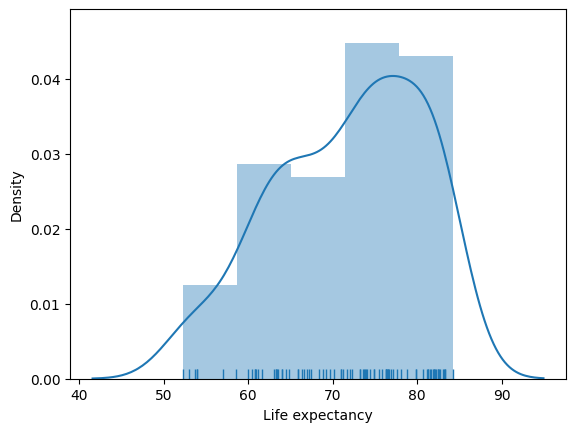

In [131]:
sns.distplot(gdp_pop_le.query("Year == 2017")["Life expectancy"], kde=True, rug=True)

In [ ]:
continents = pd.read_csv("./data/continents.csv")
continents

In [ ]:
gdp_pop_le_cont = pd.merge(left=gdp_pop_le, right=continents, left_on="Entity", right_on="Country", how="left").drop(columns="Country")
gdp_pop_le_cont

In [ ]:
continents_list = ["Africa", "Europe"]
#px.violin(gdp_pop_le_cont.query("Year == 2017 and Continent in @continents_list").dropna(), y="Life expectancy", color="Continent", points="all")
#px.box(gdp_pop_le_cont.query("Year == 2017 and Continent in @continents_list").dropna(), y="Life expectancy", color="Continent")
px.box(gdp_pop_le_cont.query("Year == 2017").dropna(), x="Life expectancy", color="Continent")

In [ ]:
px.scatter(
    gdp_pop_le_cont.query("Year == 2017"),
    x="gdp_per_capita",
    y="Life expectancy",
    marginal_x="box",
    marginal_y="histogram",
    )

In [ ]:
px.density_heatmap(
    gdp_pop_le_cont.query("Year == 2017"),
    x="gdp_per_capita",
    y="Life expectancy",
    marginal_x="histogram",
    marginal_y="histogram",
    )

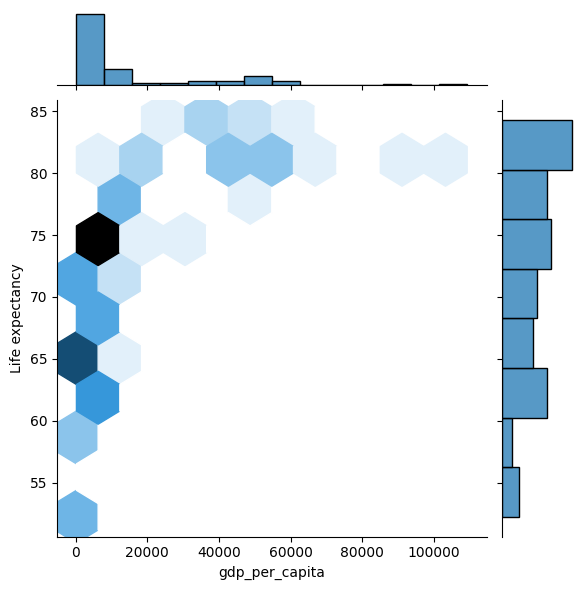

In [130]:
sns.jointplot(gdp_pop_le.query("Year == 2017"), x="gdp_per_capita", y="Life expectancy", kind="hex")

In [134]:
gdp_pop_le[gdp_pop_le["Entity"].str.contains("in")]
gdp_pop_le[gdp_pop_le["Entity"].str.startswith("Ba")]
gdp_pop_le["Entity"].str.upper()

0        ALGERIA
1        ALGERIA
2        ALGERIA
3        ALGERIA
4        ALGERIA
          ...   
5207    ZIMBABWE
5208    ZIMBABWE
5209    ZIMBABWE
5210    ZIMBABWE
5211    ZIMBABWE
Name: Entity, Length: 5212, dtype: object

In [ ]:
display(gdp_pop_le.head(5))

for k in range(5):#)gdp_pop_le.shape[0]):
    row = gdp_pop_le.iloc[k].to_dict()
    display(row)

In [146]:
df = pd.read_csv("./data/indian_states.csv")
df.head()

,State,ISO 3166-2:IN,Vehiclecode,Zone,Capital,Largest city,Statehood,Population(census 2011)[citation needed],Area(km2),Officiallanguages[39],Additional officiallanguages[39]
0,Andhra Pradesh,IN-AP,AP,Southern,Visakhapatnam (Administrative)[40]Amaravati (L...,Visakhapatnam,1 November 1956,"49,506,799","160,205",Telugu,—
1,Arunachal Pradesh,IN-AR,AR,North-Eastern,Itanagar,Itanagar,20 February 1987,"1,383,727","83,743",English,—
2,Assam,IN-AS,AS,North-Eastern,Dispur,Guwahati,26 January 1950,"31,205,576","78,550",Assamese,"Bengali, Bodo"
3,Bihar,IN-BR,BR,Eastern,Patna,Patna,26 January 1950,"104,099,452","94,163",Hindi,Urdu
4,Chhattisgarh,IN-CT,CG,Central,Nava Raipur,Raipur,1 November 2000,"25,545,198","135,194",Hindi,Chhattisgarhi


In [147]:
df = df.rename(columns=
    {
    "Officiallanguages[39]":"official",
    "Additional officiallanguages[39]":"other",
    "Population(census 2011)[citation needed]":"population",
    })

df.head()

,State,ISO 3166-2:IN,Vehiclecode,Zone,Capital,Largest city,Statehood,population,Area(km2),official,other
0,Andhra Pradesh,IN-AP,AP,Southern,Visakhapatnam (Administrative)[40]Amaravati (L...,Visakhapatnam,1 November 1956,"49,506,799","160,205",Telugu,—
1,Arunachal Pradesh,IN-AR,AR,North-Eastern,Itanagar,Itanagar,20 February 1987,"1,383,727","83,743",English,—
2,Assam,IN-AS,AS,North-Eastern,Dispur,Guwahati,26 January 1950,"31,205,576","78,550",Assamese,"Bengali, Bodo"
3,Bihar,IN-BR,BR,Eastern,Patna,Patna,26 January 1950,"104,099,452","94,163",Hindi,Urdu
4,Chhattisgarh,IN-CT,CG,Central,Nava Raipur,Raipur,1 November 2000,"25,545,198","135,194",Hindi,Chhattisgarhi


In [153]:
#display(df.official.unique())
other_langs = list(df.other.unique())
display(other_langs)

['—',
 'Bengali, Bodo',
 'Urdu',
 'Chhattisgarhi',
 'Marathi',
 'Punjabi[41][42]',
 'Sanskrit[44]',
 'Angika, Bengali, Bhojpuri, Ho, Kharia, Khortha, Kurmali, Kurukh, Magahi, Maithili, Mundari, Nagpuri, Odia, Santali, Urdu[45]',
 'English[46]',
 'English',
 'Khasi[a]',
 'Bhutia, Gurung, Lepcha, Limbu, Manggar, Mukhia, Newari, Rai, Sherpa, Tamang',
 'Urdu[49]',
 'Sanskrit[51]',
 'Hindi, Odia, Telugu, Punjabi, Santali, Urdu']

In [176]:
telugu_states = df[df.official.str.contains("Telugu") | df.other.str.contains("Telugu")]
telugu_states

,State,ISO 3166-2:IN,Vehiclecode,Zone,Capital,Largest city,Statehood,population,Area(km2),official,other
0,Andhra Pradesh,IN-AP,AP,Southern,Visakhapatnam (Administrative)[40]Amaravati (L...,Visakhapatnam,1 November 1956,"49,506,799","160,205",Telugu,—
23,Telangana,IN-TG,TS,Southern,Hyderabad[b],Hyderabad[b],2 June 2014,"35,193,978[48]","114,840[48]",Telugu,Urdu[49]
27,West Bengal,IN-WB,WB,Eastern,Kolkata,Kolkata,26 January 1950,"91,276,115","88,752","Bengali, Nepali[c]","Hindi, Odia, Telugu, Punjabi, Santali, Urdu"


In [172]:
telugu_states.population = telugu_states.population.str.replace(",", "").str.replace("\[.+\]", "", regex=True)
display(telugu_states.population)
#display(telugu_states.population.str.replace(",", ""))
#display(telugu_states.population.str.replace("\[.+\]", "", regex=True))

0     49506799
23    35193978
27    91276115
Name: population, dtype: object

In [173]:
telugu_states.population = pd.to_numeric(telugu_states.population)
display(telugu_states.population)

0     49506799
23    35193978
27    91276115
Name: population, dtype: int64

In [174]:
total_speakers = telugu_states.population.sum()
display(total_speakers)

175976892

In [177]:
df = pd.read_csv("./data/housing.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [182]:
df.columns
df.Street.value_counts()
df.columns[df.columns.str.contains("Area")]

Index(['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea'], dtype='object')

In [185]:
px.scatter(df, x="GrLivArea", y="SalePrice", color="OverallQual", size="FullBath")